# A straightforward notebook: data science models

### a range of data sci models and their application & notes 
### about the models, how and when to use them

Contents:
  - Regression
    - Simple linear regression - visual with seaborn

  ### For SQL, see separate notebook


### Broad import statements

In [1]:
            # data sourcing:
import csv
            # databases:
import sqlite3
            # data toolkit:
import numpy as np
import pandas as pd
            # plotting
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns


In [2]:
            # models
import statsmodels


# CHEATSHEETS
[SQL Cheatsheet](https://learnsql.com/blog/ultimate-sql-cheat-sheet/All-sql-cheat-sheet-a4.pdf)

[Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

[Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

#

# Simple linear regression - visual with seaborn

In [3]:
mpg = sns.load_dataset("mpg").dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
mpg.describe().applymap(lambda x: round(x))
# note: applymap to apply to every item in a dataframe

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392,392,392,392,392,392,392
mean,23,5,194,104,2978,16,76
std,8,2,105,38,849,3,4
min,9,3,68,46,1613,8,70
25%,17,4,105,75,2225,14,73
50%,23,4,151,94,2804,16,76
75%,29,8,276,126,3615,17,79
max,47,8,455,230,5140,25,82


# Regress 
###   ___________ weight (dependent variable / target)
# on 
###   ___________ horsepower (independent variable / feature)

## see [interactive demonstration of linear regression](https://setosa.io/ev/ordinary-least-squares-regression/)

# nb. OLS is very sensitive to outliers!

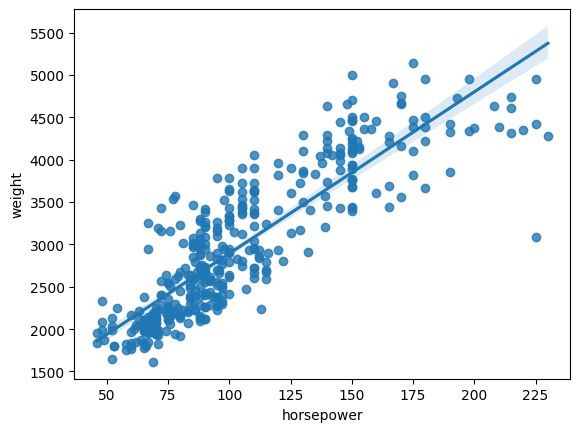

In [5]:
sns.regplot(x='horsepower', y='weight', data=mpg);


Interpretation

❌ "Higher horsepower causes higher weight"

✅ "Powerful cars seem heavier"

    By how much? Measured by the slope of the line = β1

In [6]:
# ..................

"Horsepower seems to explain a good deal of the weights' variations"

    How much?
    

In [7]:
round(mpg.corr(),2) # measures how much features contribute:

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29
model_year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00


In [14]:
## R-squared (r2) is often preferred, from [0 to 1]
print('R-Squared = ', (mpg.corr()['weight']['horsepower'])**2)
# i.e. in this case, nearly 75% of the change in weight is explained by the variance of horsepower

R-Squared =  0.7474254996898221


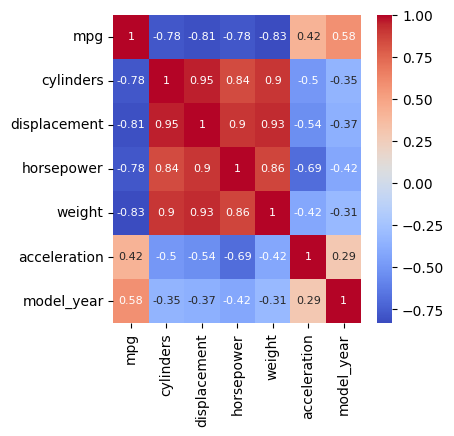

In [12]:
plt.figure(figsize = (4,4))
sns.heatmap(round(mpg.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":8});

# The higher the R^2 the closer all the points are to the suggested regression line.